<a href="https://colab.research.google.com/github/naidu199/CodeWay-ML-/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("/content/drive/MyDrive/FML_DATA_SETS/SPAM SMS DETECTION/spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.drop(columns=['Unnamed: 2',	'Unnamed: 3','Unnamed: 4'],inplace=True)

In [4]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.rename(columns={'v1':'target','v2':'Description'},inplace=True)
data.head()

,target,Description
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['target']=le.fit_transform(data['target'])
data['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

In [7]:
data['target'].describe()

count    5572.000000
mean        0.134063
std         0.340751
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: target, dtype: float64

In [9]:
data.isna().sum()

target         0
Description    0
dtype: int64

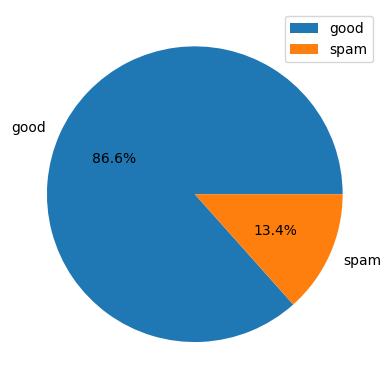

In [10]:
plt.pie(x=data['target'].value_counts(),labels=['good','spam'],autopct='%1.1f%%')
plt.legend()
plt.show()

In [16]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
data['no of characters']=data['Description'].apply(len)

In [15]:
data.head()

,target,Description,no of characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
data['no of words']=data['Description'].apply(lambda text:len(nltk.word_tokenize(text)))
data.head()

,target,Description,no of characters,no of words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
data['no of sentence']=data['Description'].apply(lambda text:len(nltk.sent_tokenize(text)))
data.head()

,target,Description,no of characters,no of words,no of sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
data.describe()

,target,no of characters,no of words,no of sentence
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,18.699390,1.996411
std,0.340751,59.690841,13.741932,1.520159
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.500000
75%,0.000000,121.000000,27.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


describing the data for fraud and harm to finding the mean values

In [23]:
data[data['target']==0].describe()

,target,no of characters,no of words,no of sentence
count,4825.0,4825.000000,4825.000000,4825.000000
mean,0.0,71.023627,17.276269,1.837720
std,0.0,58.016023,13.988585,1.454388
min,0.0,2.000000,1.000000,1.000000
25%,0.0,33.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,92.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [24]:
data[data['target']==1].describe()

,target,no of characters,no of words,no of sentence
count,747.0,747.000000,747.000000,747.000000
mean,1.0,138.866131,27.891566,3.021419
std,0.0,29.183082,6.867007,1.537580
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.500000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


If we compare  the mean values, we can see that mostly spam messages are longer in length which makes sense now we will use seaborn library to visualize it and confirm the same

<Axes: xlabel='no of characters', ylabel='Count'>

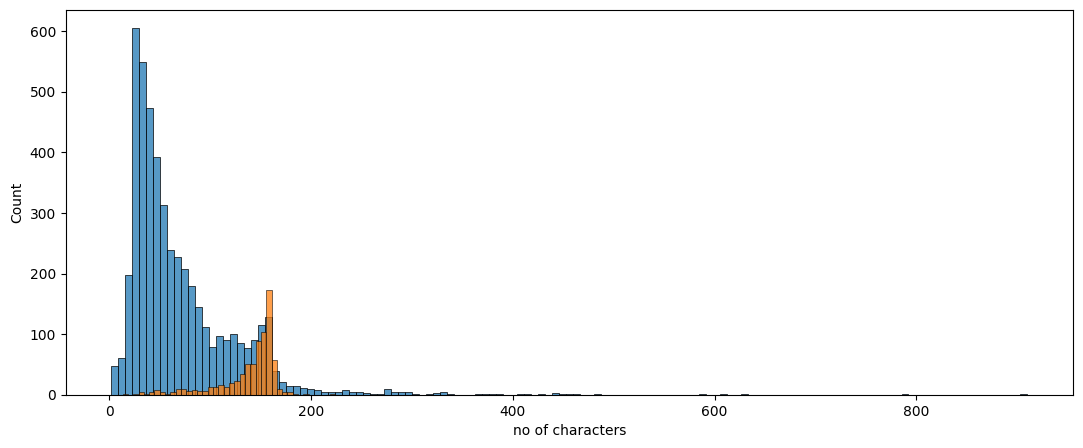

In [30]:
plt.figure(figsize=(13,5))
sns.histplot(data[data['target']==0]['no of characters'])
sns.histplot(data[data['target']==1]['no of characters'])


<Axes: xlabel='no of words', ylabel='Count'>

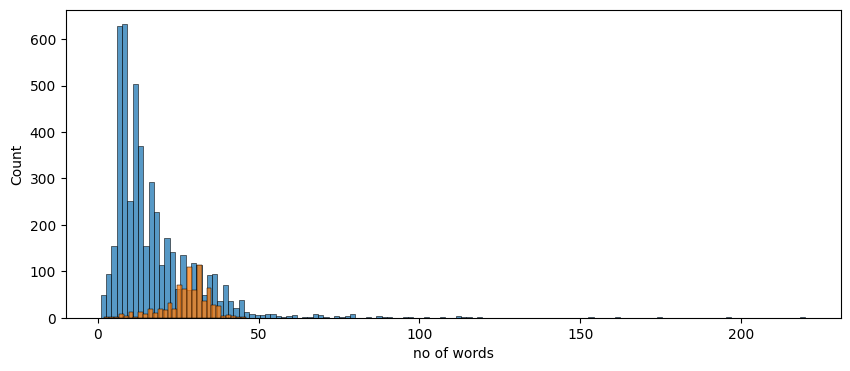

In [33]:
plt.figure(figsize=(10,4))
sns.histplot(data[data['target']==0]['no of words'])
sns.histplot(data[data['target']==1]['no of words'])

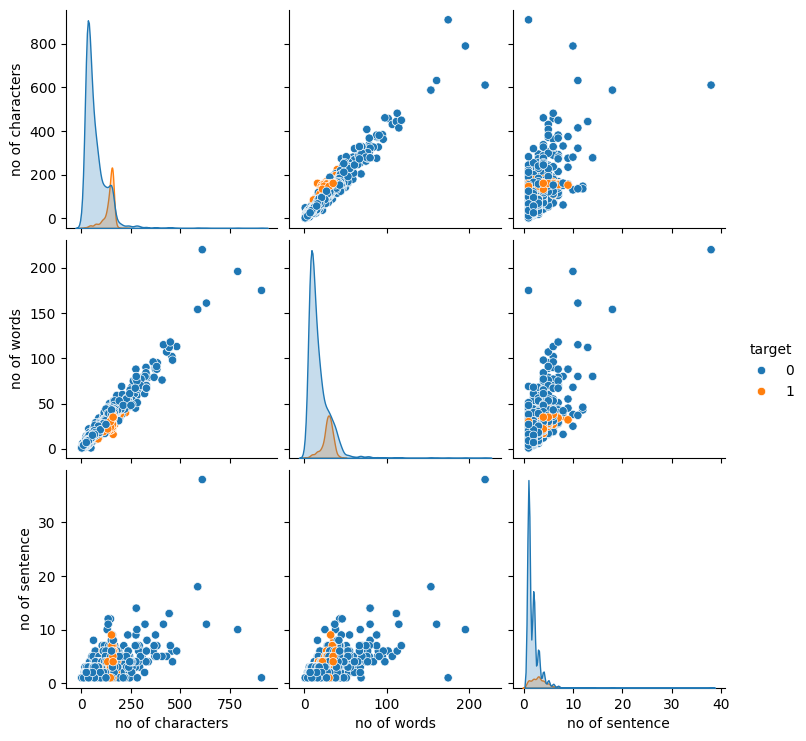

In [70]:
# plt.figure(figsize=(13,3))
sns.pairplot(data,hue='target')

In [38]:
data.corr()

<ipython-input-38-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,target,no of characters,no of words,no of sentence
target,1.000000,0.387285,0.263221,0.265332
no of characters,0.387285,1.000000,0.966310,0.631881
no of words,0.263221,0.966310,1.000000,0.685165
no of sentence,0.265332,0.631881,0.685165,1.000000


<ipython-input-39-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

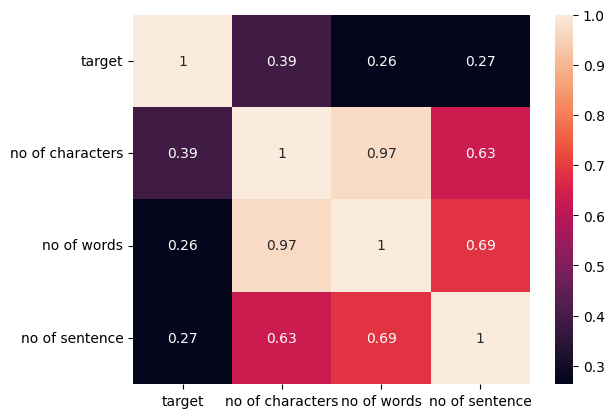

In [39]:
sns.heatmap(data.corr(),annot=True)

In [44]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

def cleaning_data(text):
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in string.punctuation and word not in stop_words]
    root_words = [stemmer.stem(word) for word in words]
    cleaned_text = " ".join(root_words)

    return cleaned_text

In [45]:
data['cleaned_description']=data['Description'].apply(cleaning_data)

In [46]:
data.head()

,target,Description,no of characters,no of words,no of sentence,cleaned_description
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data['cleaned_description'])
Y=data['target']

In [54]:
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.27,random_state=42)

In [55]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB()
BNB.fit(xtrain,ytrain)

BernoulliNB()

In [56]:
ypred=BNB.predict(xtest)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1302
           1       0.97      0.85      0.91       203

    accuracy                           0.98      1505
   macro avg       0.97      0.92      0.95      1505
weighted avg       0.98      0.98      0.98      1505



[[1297    5]
 [  31  172]]


<Axes: >

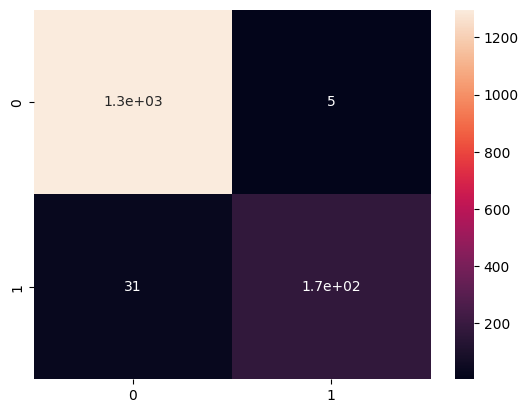

In [60]:
from sklearn.metrics import  confusion_matrix
cm=confusion_matrix(ytest,ypred)
print(cm)
sns.heatmap(cm,annot=True)


In [62]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred1=lr.predict(xtest)
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1302
           1       0.96      0.62      0.75       203

    accuracy                           0.94      1505
   macro avg       0.95      0.81      0.86      1505
weighted avg       0.95      0.94      0.94      1505



[[1297    5]
 [  78  125]]


<Axes: >

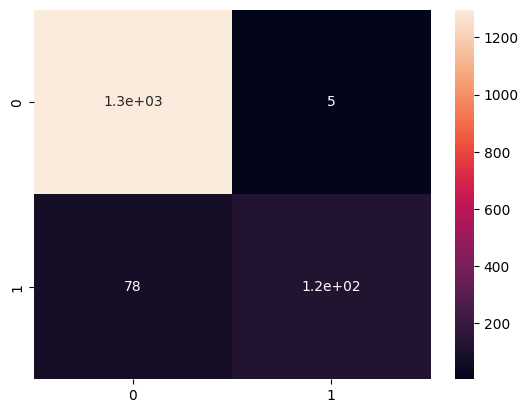

In [63]:
cm1=confusion_matrix(ytest,ypred1)
print(cm1)
sns.heatmap(cm1,annot=True)

In [65]:
from sklearn.svm import LinearSVC
lsvc=LinearSVC()
lsvc.fit(xtrain,ytrain)
ypred2=lsvc.predict(xtest)
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1302
           1       0.98      0.85      0.91       203

    accuracy                           0.98      1505
   macro avg       0.98      0.92      0.95      1505
weighted avg       0.98      0.98      0.98      1505



[[1298    4]
 [  30  173]]


<Axes: >

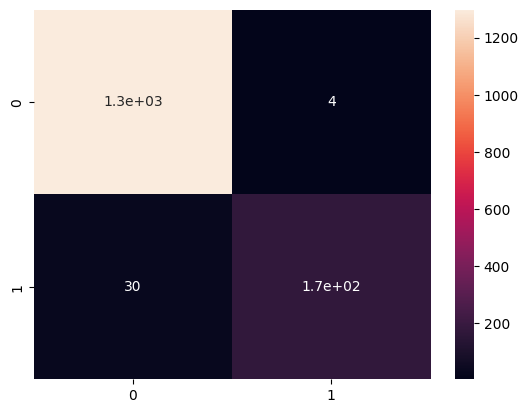

In [66]:
cm2=confusion_matrix(ytest,ypred2)
print(cm2)
sns.heatmap(cm2,annot=True)